# K Nearest Neighbors
### by Sklearn Module

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading the Data of Telecomunication 

In [2]:
data = pd.read_csv('../data/teleCust1000t.csv')
data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


### Normalizing the X(independent variables) and Y(labels)

In [3]:
y = data[['custcat']]
x = data[list(data.columns[:-1])]

from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
y = np.asanyarray(y).ravel()  # ravel() is used to convert nd array to 1d array

### Spliting the Data 80:20 Train/Test

In [4]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2)

### Training KNN Classifier & Predicting best K

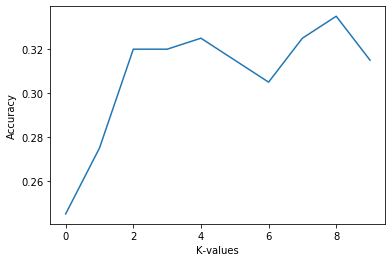

Best Accuracy:  0.335 , with K =  9


In [5]:
from sklearn import neighbors
from sklearn import metrics

Ks = 10
mean_accuracy = np.zeros(Ks)

for i in range(1, Ks + 1):
    clf = neighbors.KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train, y_train)
    
    y_hat = clf.predict(x_test)
    mean_accuracy[i - 1] =  metrics.accuracy_score(y_test, y_hat)


plt.plot(np.arange(Ks), mean_accuracy)
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.show()

print("Best Accuracy: ", max(mean_accuracy), ", with K = ", mean_accuracy.argmax() + 1)